 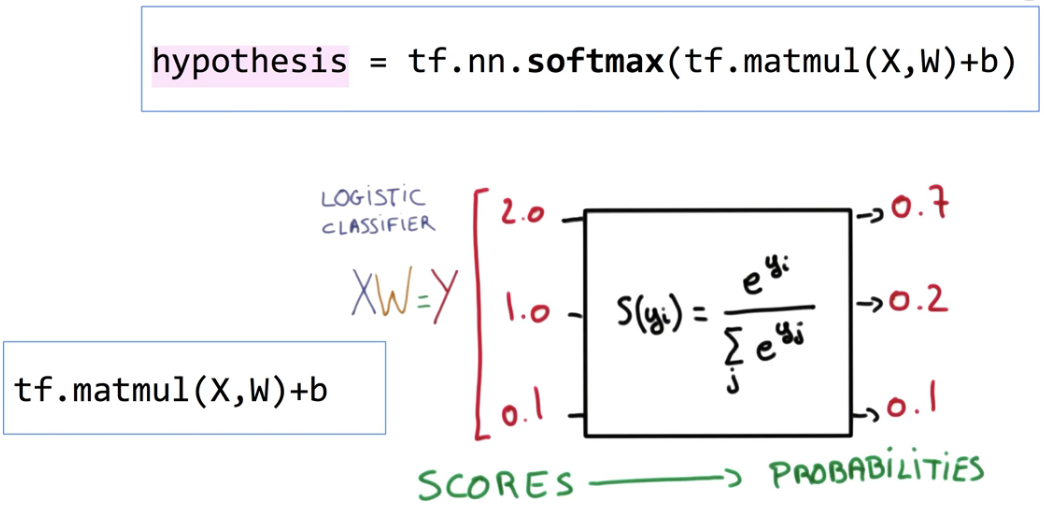

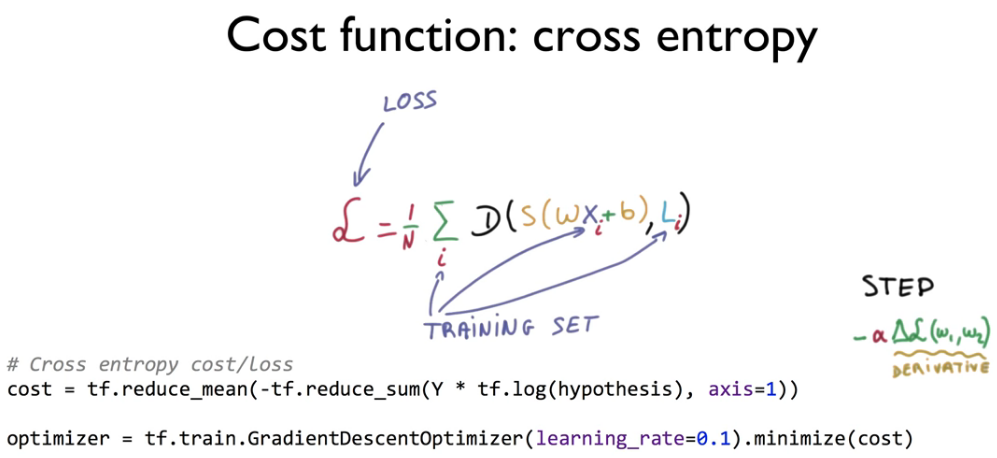

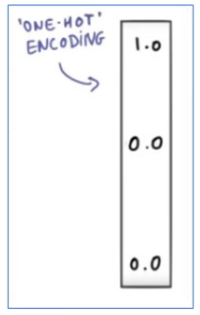

In [1]:
import tensorflow as tf

In [2]:
tf.set_random_seed(777)

In [3]:
x_data = [[1, 2, 1, 1],
          [2, 1, 3, 2],
          [3, 1, 3, 4],
          [4, 1, 5, 5],
          [1, 7, 5, 5],
          [1, 2, 5, 6],
          [1, 6, 6, 6],
          [1, 7, 7, 7]]
y_data = [[0, 0, 1],
          [0, 0, 1],
          [0, 0, 1],
          [0, 1, 0],
          [0, 1, 0],
          [0, 1, 0],
          [1, 0, 0],
          [1, 0, 0]]

In [5]:
X = tf.placeholder("float", [None,4])
Y = tf.placeholder("float", [None,3])

In [6]:
nb_classes = 3
W = tf.Variable(tf.random_normal([4, nb_classes]), name='weight')
b = tf.Variable(tf.random_normal([nb_classes]), name='bias')

Instructions for updating:
Colocations handled automatically by placer.


In [9]:
# tf.nn.softmax computes softmax activations
# softmax = exp(logits) / reduce_sum(exp(logits), dim)

hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

In [10]:
# Cross entropy cost/loss
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis = 1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

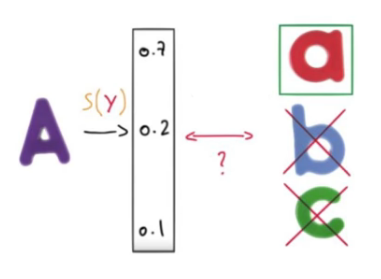

In [13]:
# Launch graph
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for step in range(2001):
            _, cost_val = sess.run([optimizer, cost], feed_dict={X: x_data, Y: y_data})

            if step % 200 == 0:
                print(step, cost_val)
                
    print('--------------')
    # Testing & One-hot encoding
    a = sess.run(hypothesis, feed_dict={X: [[1, 11, 7, 9]]})
    print(a, sess.run(tf.argmax(a, 1)))

    print('--------------')
    b = sess.run(hypothesis, feed_dict={X: [[1, 3, 4, 3]]})
    print(b, sess.run(tf.argmax(b, 1)))

    print('--------------')
    c = sess.run(hypothesis, feed_dict={X: [[1, 1, 0, 1]]})
    print(c, sess.run(tf.argmax(c, 1)))

    print('--------------')
    all = sess.run(hypothesis, feed_dict={X: [[1, 11, 7, 9], [1, 3, 4, 3], [1, 1, 0, 1]]})
    print(all, sess.run(tf.argmax(all, 1)))

0 14.149523
200 0.5816432
400 0.46831578
600 0.37114018
800 0.27992386
1000 0.23644295
1200 0.2142207
1400 0.19572866
1600 0.18008918
1800 0.16669035
2000 0.15508719
--------------
[[1.0038184e-02 9.8995495e-01 6.8317431e-06]] [1]
--------------
[[0.8034606  0.18528557 0.01125388]] [0]
--------------
[[8.6216332e-09 3.0195317e-04 9.9969804e-01]] [2]
--------------
[[1.0038184e-02 9.8995495e-01 6.8317431e-06]
 [8.0346060e-01 1.8528555e-01 1.1253879e-02]
 [8.6216332e-09 3.0195317e-04 9.9969804e-01]] [1 0 2]
